<table align="left" >

  <tr><th >
      <a target="_blank"  href="http://www.fsdmfes.ac.ma/"><img src="https://raw.githubusercontent.com/m-elkhou/Object-Detection/master/assets/usmba.png" width=70px /></a>
  </th><th>
      <a target="_blank"  href="http://www.fsdmfes.ac.ma/"><img src="https://raw.githubusercontent.com/m-elkhou/Object-Detection/master/assets/fsdm.png" width=75px/></a>
  </th><th>
      <a target="_blank"  href="https://www.univ-paris13.fr/"><img src="https://raw.githubusercontent.com/m-elkhou/Object-Detection/master/assets/uspn.png" width=150px/></a>
  </th></tr>

  <tr><td style="text-align:center;">
      <a target="_blank"  href="http://www.fsdmfes.ac.ma/">USMBA</a>
  </td><td style="text-align:center;">
      <a target="_blank"  href="http://www.fsdmfes.ac.ma/">FSDM</a>
  </td><td style="text-align:center;">
      <a target="_blank"  href="https://www.univ-paris13.fr/">USPN</a>
  </td></tr>
  
</table>

***

# Deep Learning TP1 : Introduction aux réseaux de neurones

***

**Réalisée par :**
- [Mohammed EL-KHOU](https://www.linkedin.com/in/m-elkhou/)
>- mohammed.elkhou1@usmba.ac.ma
>- m.elkhou@hotmail.com

**Encadré par :**
- [Nistor Grozavu](https://lipn.univ-paris13.fr/~grozavu/)
>- nistor.grozavu@lipn.univ-paris13.fr
>- nistor.grozavu@gmail.com

</br>
<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.02-Simple-Scatter-Plots.ipynb">
    <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory">
</a>

</br>

***



In [3]:
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

1. Générez un ensemble de données 2-D qui est composé de deux classes
(notées -1 et 1) linéairement séparables d’objets répartis uniformément. Générez 50 objets pour
chaque classe. Un moyen facile est de faire cela pour les coordonnées x et y séparément et les
combiner ensuite. Étiquetez les variables par «area» et «perimeter».

In [4]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=47)
y = np.where(y==0, -1, 1)

print("X : \n" , X[:3], "\n\n y : \n", y[:3])

X : 
 [[-9.05297897  9.54145587]
 [ 4.81264092 -2.44308991]
 [-5.72313282 10.91880908]] 

 y : 
 [-1  1 -1]


2. Vérifiez le résultat obtenu en utilisant scatter et en récupérant les étiquettes des données
et les étiquettes des variables.on va utiliser une matrice

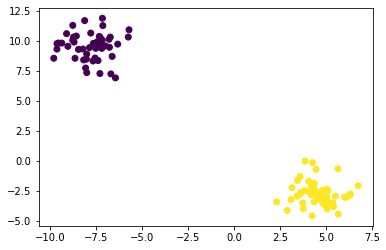

In [7]:
plt.scatter(X[:,0], X[:,1], c=y, marker='o')
plt.show()

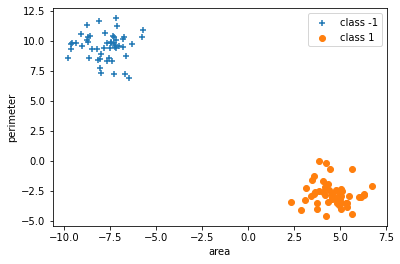

In [8]:
fif, ax = plt.subplots(1)
plt.scatter(X[y==-1, 0], X[y==-1, 1], label='class -1', marker='+')
plt.scatter(X[y==1, 0], X[y==1, 1], label='class 1', marker='o')
ax.legend()
ax.set_xlabel('area')
ax.set_ylabel('perimeter')
plt.show()

3. On considère un réseau de type Adaline. On veut apprendre l’ensemble d'associations entre les
données et les classes. L’algorithme d’apprentissage est le suivant (voir le cours) :

<div align="center"><img src="" /></div>

4. Ecrire une fonction err_adal permettant de calculer l’écart entre la sortie désirée (classe) et la
sortie calculée par Adaline.


5. Ecrire une fonction grad_adal permettant de calculer une approximation du gradient.


6. Ecrire une fonction adapt_adal permettant de mettre à jour les poids des connexions dans
Adaline en fonction du gradient.


7. Ecrire une fonction Adaline utilisant les fonctions précédentes permettant de faire un
apprentissage du modèle Adaline sur la base de données générée précédemment. On utilisera la
fonction de transition indiquée dans la figure ci-dessous, ainsi que les valeurs initiales des poids
et un pas du gradient de ε=0.1.

8. A chaque itération de l’apprentissage représenter graphiquement dans un même repère
orthogonal l’ensemble des échantillons et l’hyperplan séparant les deux classes.

9. On propose de traiter les mêmes données avec cette fois le Perceptron dont l’algorithme est
donné ci-dessous :

Ecrire une fonction sortie_perc permettant de calculer la sortie calculée par le Perceptron.

10. Ecrire une fonction grad_perc permettant de calculer une approximation du gradient.


11. Ecrire une fonction adapt_perc permettant de mettre à jour les poids des connexions dans
Adaline en fonction du gradient.


12. Ecrire une fonction perceptron utilisant les fonctions précédentes permettant de faire un
apprentissage du modèle Perceptron sur la même base de données qu’Adaline. On utilisera les
valeurs d’initialisation données dans la question 7.


13. A chaque itération de l’apprentissage représenter graphiquement dans un même repère
orthogonal l’ensemble des échantillons et l’hyperplan séparant les deux classes.


### Bonus :

14. Générez un ensemble de 10 données de la deuxième classe (voir figure ci-dessous) pour
compléter la base de données initiale de telle façon que le problème reste linéairement séparable.

15. Exécutez les programmes Adaline et Perceptron sur la nouvelle base de données et représentez
graphiquement dans un même repère orthogonal l’ensemble des échantillons et les deux
hyperplans séparant les deux classes : celui d’Adaline et celui du Perceptron